
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Thursday, November 29th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please format **your filename to include your EID** (ex. ss324.ipynb or ss324_mj345.ipypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

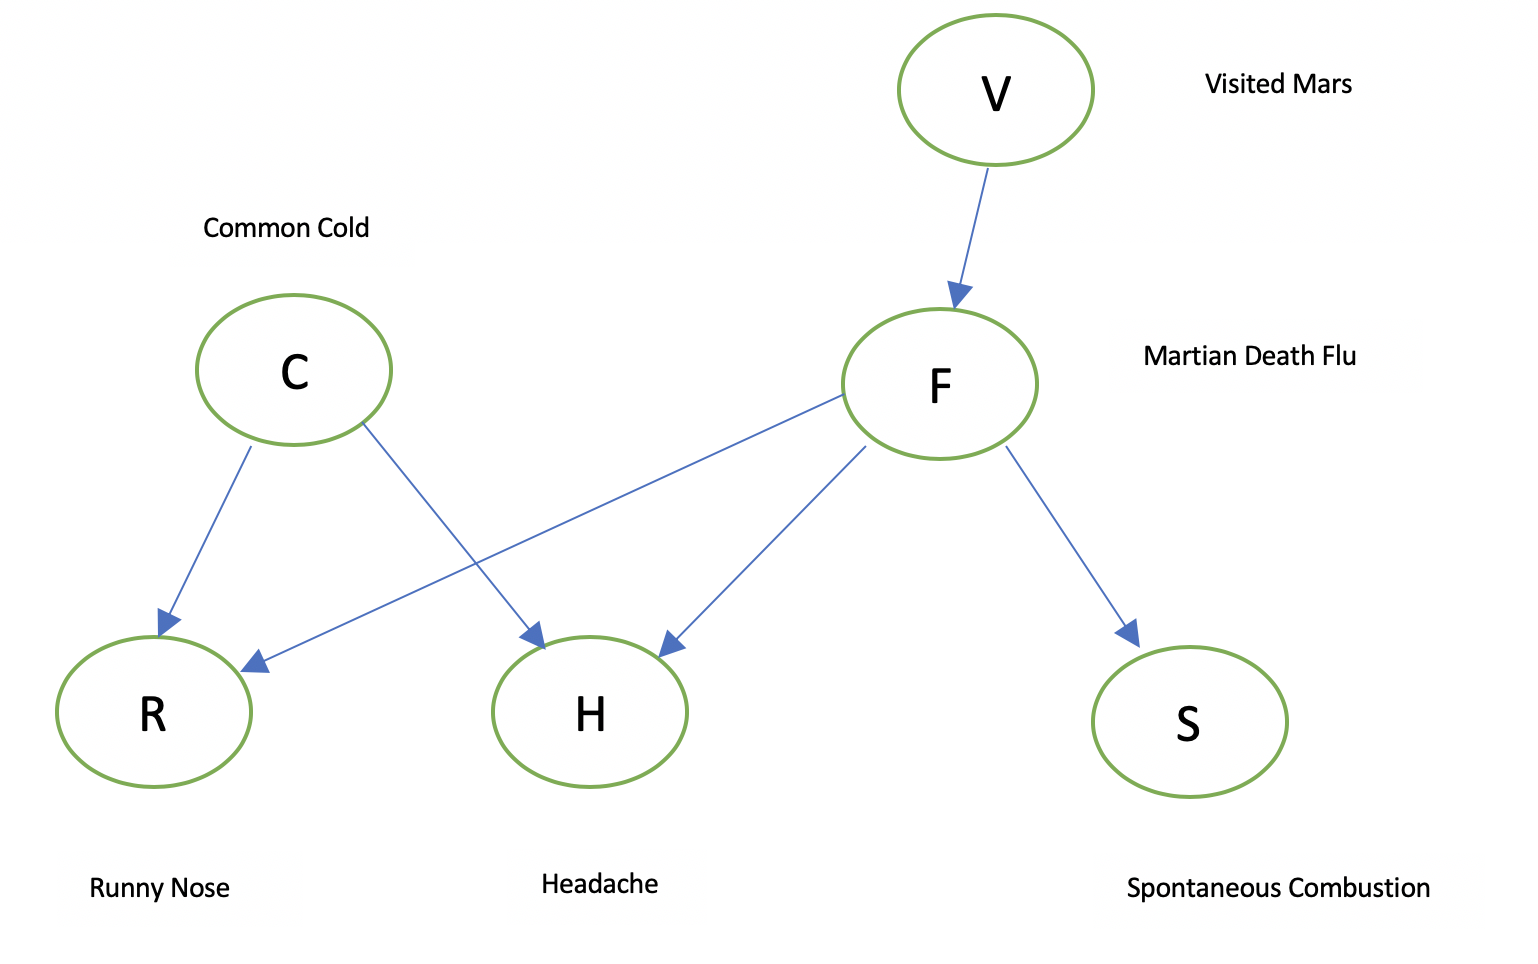

In [1]:
from IPython.display import Image
Image(filename='BBN.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that a person has a headache.

(b) (5 pts) Given that a person visited Mars, what is the probability that he has a runny nose?

(c) (5 pts) Given that a person visited Mars and has a runny nose, what is the probability that the person has a common cold and not the Martian Death Flu?

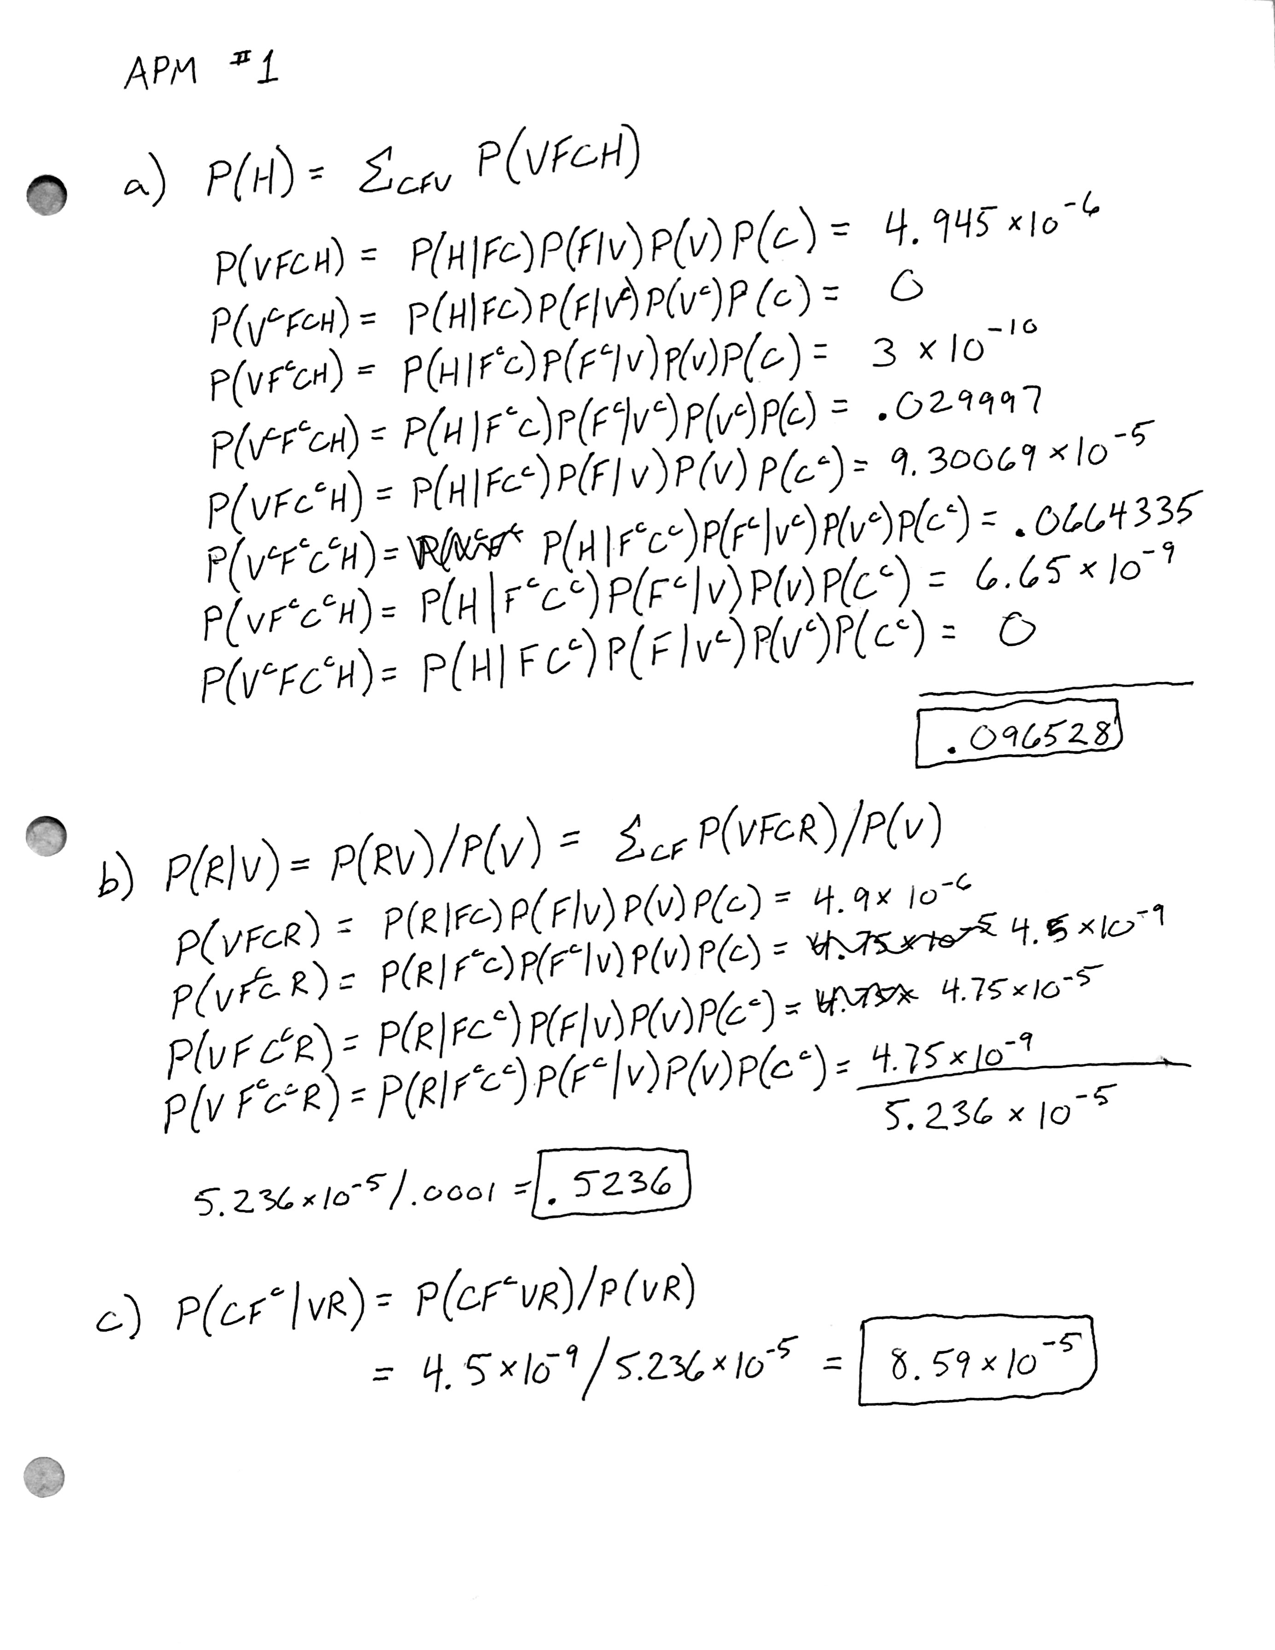

In [49]:
from IPython.display import Image
Image('https://i.imgur.com/qxolyRd.png',retina=True)

# Question 2 - Support Vector Machine ( 15 points)

## Gender Recognition by voice

In this question, we will try to identify a voice as male or female. The dataset is taken from kaggle [Gender Recognition by Voice](https://www.kaggle.com/primaryobjects/voicegender/home). Go ahead and read it to understand the different variables.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('voice.csv')

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
data.shape

(3168, 21)

In [5]:
X=data.iloc[:, :-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [6]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,-1]

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [10]:
print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (2122, 20) (2122,)
test (1046, 20) (1046,)


(a) (6pts) Apply a linear SVM, using scikit-SVM. Specify how you chose the slack cost/penalty (‘C’ parameter)for the model. Maintain all other parameters as default. Hint: http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html will make 10-fold cross-validation easier.
The code to get the training/testing data is provided below.

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [13]:
clf_svc_kfold = SVC(kernel = 'linear', random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svc1 = GridSearchCV(clf_svc_kfold, param_grid, cv=10)             
grid_search_svc1.fit(X_train, y_train)
best_C1 = grid_search_svc1.best_params_['C']
              
clf_svc = SVC(kernel = 'linear', C = best_C1)
clf_svc.fit(X_train, y_train)
clf_svc_pred = clf_svc.predict(X_test)

(b) (6pts) Repeat (a) but with a Gaussian radial basis kernel.

In [14]:
clf_svc_kfold2 = SVC(kernel = 'rbf', random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svc2 = GridSearchCV(clf_svc_kfold2, param_grid, cv=10)             
grid_search_svc2.fit(X_train, y_train)
best_C2 = grid_search_svc2.best_params_['C']
              
clf_svc_rbf = SVC(kernel = 'rbf', C = best_C2)
clf_svc_rbf.fit(X_train, y_train)
clf_svc_rbf_pred = clf_svc_rbf.predict(X_test)

(c) (3pts) Summarize the comparative performance (mean error rates) of the classifiers. What can you conclude? (Be brief.)

In [18]:
from sklearn.metrics import accuracy_score

acc_linear = accuracy_score(y_test, clf_svc_pred)
acc_rbf = accuracy_score(y_test, clf_svc_rbf_pred)

print('Mean Error Rate - SVC with linear kernel: %f \n'%(1-acc_linear))
print('Mean Error Rate - SVC with Gaussian radial basis kernel: %f \n'%(1-acc_rbf))

Mean Error Rate - SVC with linear kernel: 0.022945 

Mean Error Rate - SVC with Gaussian radial basis kernel: 0.019120 



Since the Gaussian radial basis kernel has a lower mean error rate, it is the better classifier for this data set. In general, a Gaussian kernel is better for data with fewer features, but with a boundary that is non-linear. The instances in which a linear kernel is better than a non-linear kernet are similar to those when LDA outperforms QDA.

# Question 3 - Ensembles ( 20 points)

In this question, we will compare the performance of different ensemble methods for classification problems: [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier). 

We will use the dataset from the kaggle competition [GiveMeSomeCredit](https://www.kaggle.com/c/GiveMeSomeCredit). We will work on a smaller version of this dataset. The dataset is available on canvas as ensemble-dataset.csv. 
We will predict the probability that somebody will experience financial distress in the next two years. The dataset has already been split into train and test sets for you.

In [22]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('ensemble-dataset.csv')

In [24]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30.59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60.89DaysPastDueNotWorse,NumberOfDependents
0,0,1.062646,50,2,0.179032,3490,8,1,0,1,1
1,0,0.003591,83,0,0.000869,10352,14,0,0,0,0
2,0,1.000000,22,0,0.000000,100,1,0,0,0,0
3,0,0.000000,52,0,0.336355,7060,10,0,2,0,3
4,0,0.220152,54,0,0.235064,4083,15,0,0,0,1


In [25]:
data.shape

(5049, 11)

In [26]:
from sklearn.model_selection import train_test_split
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

print('train',X_train.shape,y_train.shape)
print('test',X_test.shape,y_test.shape)

train (3382, 10) (3382,)
test (1667, 10) (1667,)


1. (5pts) Use a [Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict whether somebody will experience financial distress in the next two years. Find the best parameters (including *n_estimators* and *criterion*) using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Report the confusion matrix  and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on test data. You will need [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) for roc_auc_score. Plot the feature importance as well.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# Parameter tuning - Random Forest
clf_rf = RandomForestClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700]
criterion = ['gini', 'entropy']
param_grid = dict(n_estimators=n_estimators, criterion=criterion)
grid_search_rf = GridSearchCV(clf_rf, param_grid, scoring="accuracy")

grid_search_rf.fit(X_train, y_train)
rf_criterion = grid_search_rf.best_params_['criterion']
rf_n_estimators = grid_search_rf.best_params_['n_estimators']

In [38]:
print('Optimal Criterion Method (RF): %s \n'%(rf_criterion))
print('Optimal Number of Estimators (RF): %f \n'%(rf_n_estimators))

Optimal Criterion Method (RF): entropy 

Optimal Number of Estimators (RF): 300.000000 



In [34]:
#Fit Random Forest model with optimal parameters, evaluate on test data
clf_rf_best = RandomForestClassifier(n_estimators=rf_n_estimators, criterion=rf_criterion, random_state=42)
clf_rf_best.fit(X_train, y_train)
y_pred_rf = clf_rf_best.predict(X_test)

confusion_rf = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix - Random Forest:\n',confusion_rf,'\n')

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy - Random Forest: %f \n'%(accuracy_rf))

Confusion Matrix - Random Forest:
 [[1547   12]
 [  95   13]] 

Accuracy - Random Forest: 0.935813 



ROC_AUC Score - Random Forest: 0.810512 



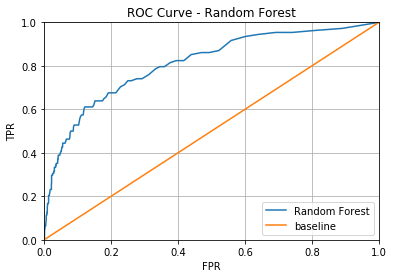

In [35]:
#Plot ROC Curve, calculate ROC_AUC
rf_prob = clf_rf_best.predict_proba(X_test)[:,1]
tpr = {}
fpr = {}
roc = {}

fpr['RF'], tpr['RF'], _ = roc_curve(y_test, rf_prob)
roc['RF'] = roc_auc_score(y_test, rf_prob)
    
plt.plot(fpr['RF'], tpr['RF'], label = 'Random Forest')
plt.plot([0, 1], [0, 1], label = 'baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)

print('ROC_AUC Score - Random Forest: %f \n'%(roc['RF']))

Text(0.5, 0, 'Relative Importance')

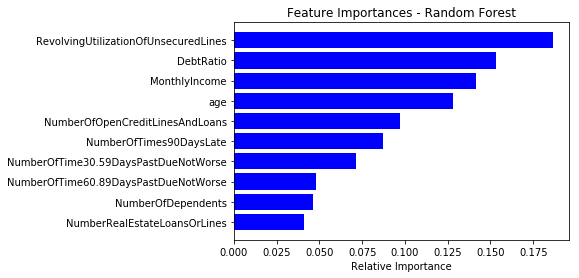

In [36]:
features=list(X)
importances = clf_rf_best.feature_importances_
indices = np.argsort(importances)
features_sort = []
for i in range(len(indices)):
    key = indices[i]
    features_sort.append(features[key])

plt.figure(1)
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features_sort)
plt.xlabel('Relative Importance')

2. (10pts) Use [Gradient Boosting Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) (GBDT), and [AdaBoost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for this problem. Again, find the best parameters (including *n_estimators, learning_rate,* and *max_depth (GBDT only)*), and report the confusion matrix and roc_auc_score on test data for each classifier. Also plot the feature importance for each classifier.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Parameter tuning - GBDT
clf_gb = GradientBoostingClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]
max_depth = [1, 2, 3, 4, 5]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate, max_depth=max_depth)
grid_search_gb = GridSearchCV(clf_gb, param_grid, scoring="accuracy")

grid_search_gb.fit(X_train, y_train)
gb_learning_rate = grid_search_gb.best_params_['learning_rate']
gb_n_estimators = grid_search_gb.best_params_['n_estimators']
gb_max_depth = grid_search_gb.best_params_['max_depth']

In [40]:
print('Optimal Learning Rate (GBDT): %f \n'%(gb_learning_rate))
print('Optimal Number of Estimators (GBDT): %f \n'%(gb_n_estimators))
print('Optimal Max Depth (GBDT): %f \n'%(gb_max_depth))

Optimal Learning Rate (GBDT): 0.010000 

Optimal Number of Estimators (GBDT): 500.000000 

Optimal Max Depth (GBDT): 1.000000 



In [41]:
#Fit GBDT model with optimal parameters, evaluate on test data
clf_gb_best = GradientBoostingClassifier(n_estimators=gb_n_estimators, learning_rate=gb_learning_rate, max_depth=gb_max_depth, random_state=42)
clf_gb_best.fit(X_train, y_train)
y_pred_gb = clf_gb_best.predict(X_test)

confusion_gb = confusion_matrix(y_test, y_pred_gb)
print('Confusion Matrix - GBDT:\n',confusion_gb,'\n')

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print('Accuracy - GBDT: %f \n'%(accuracy_gb))

Confusion Matrix - GBDT:
 [[1550    9]
 [  90   18]] 

Accuracy - GBDT: 0.940612 



ROC_AUC Score - Gradient Boosting Decision Tree: 0.833797 



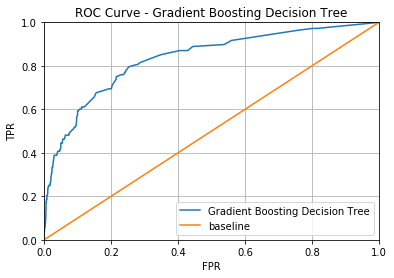

In [42]:
#Plot ROC Curve, calculate ROC_AUC
gb_prob = clf_gb_best.predict_proba(X_test)[:,1]
tpr = {}
fpr = {}
roc = {}

fpr['GB'], tpr['GB'], _ = roc_curve(y_test, gb_prob)
roc['GB'] = roc_auc_score(y_test, gb_prob)
    
plt.plot(fpr['GB'], tpr['GB'], label = 'Gradient Boosting Decision Tree')
plt.plot([0, 1], [0, 1], label = 'baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Gradient Boosting Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)

print('ROC_AUC Score - Gradient Boosting Decision Tree: %f \n'%(roc['GB']))

Text(0.5, 0, 'Relative Importance')

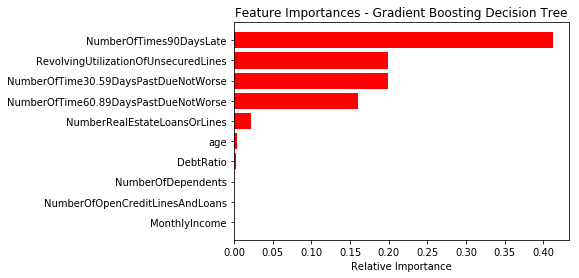

In [43]:
#Find and plot Feature Importances
features=list(X)
importances = clf_gb_best.feature_importances_
indices = np.argsort(importances)
features_sort = []
for i in range(len(indices)):
    key = indices[i]
    features_sort.append(features[key])

plt.figure(1)
plt.title('Feature Importances - Gradient Boosting Decision Tree')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), features_sort)
plt.xlabel('Relative Importance')

In [44]:
from sklearn.ensemble import AdaBoostClassifier

# Parameter tuning - AdaBoost
clf_ab = AdaBoostClassifier()
n_estimators = [100, 200, 300, 400, 500, 600, 700]
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1]
param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
grid_search_ab = GridSearchCV(clf_ab, param_grid, scoring="accuracy")

grid_search_ab.fit(X_train, y_train)
ab_learning_rate = grid_search_ab.best_params_['learning_rate']
ab_n_estimators = grid_search_ab.best_params_['n_estimators']

In [45]:
print('Optimal Learning Rate (AdaBoost): %f \n'%(ab_learning_rate))
print('Optimal Number of Estimators (AdaBoost): %f \n'%(ab_n_estimators))

Optimal Learning Rate (AdaBoost): 0.010000 

Optimal Number of Estimators (AdaBoost): 500.000000 



In [46]:
#Fit AdaBoost model with optimal parameters, evaluate on test data
clf_ab_best = AdaBoostClassifier(n_estimators=ab_n_estimators, learning_rate=ab_learning_rate, random_state=42)
clf_ab_best.fit(X_train, y_train)
y_pred_ab = clf_ab_best.predict(X_test)

confusion_ab = confusion_matrix(y_test, y_pred_ab)
print('Confusion Matrix - AdaBoost:\n',confusion_ab,'\n')

accuracy_ab = accuracy_score(y_test, y_pred_ab)
print('Accuracy - AdaBoost: %f \n'%(accuracy_ab))

Confusion Matrix - AdaBoost:
 [[1554    5]
 [  99    9]] 

Accuracy - AdaBoost: 0.937612 



ROC_AUC Score - AdaBoost: 0.833755 



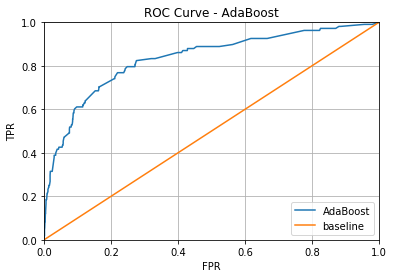

In [47]:
#Plot ROC Curve, calculate ROC_AUC
ab_prob = clf_ab_best.predict_proba(X_test)[:,1]
tpr = {}
fpr = {}
roc = {}

fpr['AB'], tpr['AB'], _ = roc_curve(y_test, ab_prob)
roc['AB'] = roc_auc_score(y_test, ab_prob)
    
plt.plot(fpr['AB'], tpr['AB'], label = 'AdaBoost')
plt.plot([0, 1], [0, 1], label = 'baseline')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.grid(True)

print('ROC_AUC Score - AdaBoost: %f \n'%(roc['AB']))

Text(0.5, 0, 'Relative Importance')

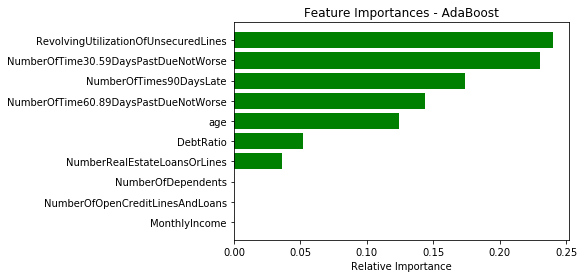

In [48]:
# Find and plot Feature Importances
features=list(X)
importances = clf_ab_best.feature_importances_
indices = np.argsort(importances)
features_sort = []
for i in range(len(indices)):
    key = indices[i]
    features_sort.append(features[key])

plt.figure(1)
plt.title('Feature Importances - AdaBoost')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features_sort)
plt.xlabel('Relative Importance')

3. (5pts) Point out one advantage and one disadvantage of Random Forest compared to GBDT.

Random forest was far faster, and had a barely higher true positive rate (8/108 vs 6/108) than a gradient boosted tree. 
Random forest also had a higher false positive rate, but given that we are predicting financial distress false positives likely have a lower cost.
The variable importances are different for each model. Random forest seems to emphasize more recent history while the GBDT prefers the longer term data. GBDT assigns an importance of zero to certain features, simplifying the classifier.